In [1]:
# add dependencies
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine, inspect
from sqlalchemy.orm import Session
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import Column, Integer, String, Float, and_, Date, func, desc

# PyMySQL 
import pymysql
pymysql.install_as_MySQLdb()

In [2]:
# collect the start and end dates of the trips
date_entry = "2018-05-01"
year, month, day = map(int, date_entry.split('-'))
start_date = datetime.date(year, month, day)

date_entry = "2018-05-10"
year, month, day = map(int, date_entry.split('-'))
end_date = datetime.date(year, month, day)

In [3]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [4]:
# Using the inspector to print the column names within the 'Salaries' table and its types
### BEGIN SOLUTION
inspector=inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])
### END SOLUTION

station_id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [5]:
tables=inspector.get_table_names()
# Using the inspector to print the column names within the 'Salaries' table and its types
### BEGIN SOLUTION
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])
### END SOLUTION

measurement_id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs FLOAT


In [6]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
### BEGIN SOLUTION
engine.execute('SELECT * FROM station LIMIT 10').fetchall()
### END SOLUTION

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999995, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [7]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
### BEGIN SOLUTION
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()
### END SOLUTION

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (6, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (7, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (8, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (9, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (10, 'USC00519397', '2010-01-12', 0.0, 61.0)]

In [8]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [9]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [10]:
# Create a session
session = Session(bind=engine)

In [11]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [12]:
Station = Base.classes.station
Measurement = Base.classes.measurement
session = Session(bind=engine)

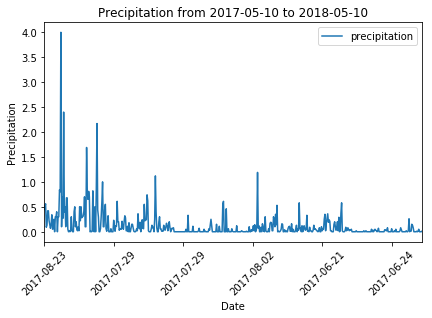

In [13]:
# Precipitation Analysis

# get the date 1 year ago
year_ago = end_date - datetime.timedelta(365)

pcp_year = session.query(Measurement.date, Measurement.prcp).filter(and_(Measurement.date <= end_date,
                                                                        Measurement.date >= year_ago)).all()

# create the dataframe and set date as the index
pcp_df = pd.DataFrame(pcp_year, columns=["date", "precipitation"])
pcp_df.set_index('date', inplace=True)
# Plot the dataframe as a chart using pandas plotting
pcp_df.iloc[::-1].plot(title="Precipitation from %s to %s" % (year_ago, end_date))
plt.tight_layout()
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Precipitation from %s to %s" %(year_ago,end_date))
plt.xticks(rotation='45')
plt.show()


In [14]:
# give summary statistics of the dataframe
pcp_df.describe()

,precipitation
count,545.000000
mean,0.120220
std,0.287541
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.000000


In [15]:
#Station Analysis
# calculate the number of stations
num_stations = session.query(Station.station).count()
print("The number of stations is: %s" % num_stations)

The number of stations is: 9


In [16]:
# find the most active station
act_stations = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).order_by(desc(func.count(Measurement.date))).all()

most_active = act_stations[0][0]
num_observations = act_stations[0][1]

print("The most active station is: %s" % most_active)
print("Number of observations for station %s: %s" % (most_active, num_observations))


The most active station is: USC00519281
Number of observations for station USC00519281: 2772


In [17]:
# get the last 12 months of temperature observation data

temp_year = session.query(Measurement.date, Measurement.tobs).filter(and_(Measurement.date <= end_date,
                                                                        Measurement.date >= year_ago,
                                                                         Measurement.station == most_active)).all()

# create the dataframe and set date as the index
temp_df = pd.DataFrame(temp_year, columns = ["date", "temperature"])
temp_df.set_index('date', inplace=True)

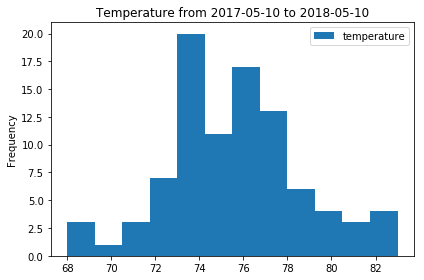

In [18]:
# create a histogram of the temperature data with bins=12
temp_df.iloc[::-1].plot.hist(title="Temperature from %s to %s" % (year_ago, end_date), bins = 12)
plt.tight_layout()
plt.show()

#Temperature Analysis

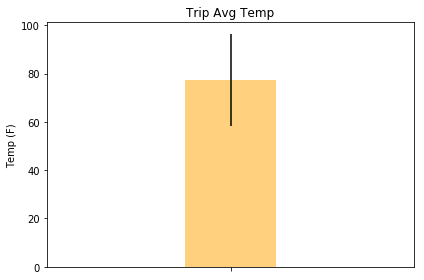

In [19]:
#Temperature Analysis

def calc_temps(start, end):
    # calculate the date 1 year ago
    one_year = end - datetime.timedelta(365)
    
    # get the maximum temperature
    max_temp = session.query(func.max(Measurement.tobs)).filter(and_(Measurement.date <= end, Measurement.date >= one_year)).all()
    maximum = max_temp[0][0]
    
    # get the minimum temperature
    min_temp = session.query(func.min(Measurement.tobs)).filter(and_(Measurement.date <= end, Measurement.date >= one_year)).all()
    minimum = min_temp[0][0]
    
    # get the average temperature
    avg_temp = session.query(func.avg(Measurement.tobs)).filter(and_(Measurement.date <= end, Measurement.date >= one_year)).all()
    average = avg_temp[0][0]
    
    # create the plot
    objects = [str(end)]
    x_axis = np.arange(len(objects))
    fig, ax = plt.subplots()
    temp_plot = ax.bar(x_axis, average, yerr=(maximum-minimum), color = "orange", alpha = .5, width = .5)
    tick_locations = [value for value in x_axis]
    plt.xticks(tick_locations, [])
    plt.xlim(-1, len(x_axis))
    plt.title("Trip Avg Temp")
    plt.ylabel("Temp (F)")
    plt.tight_layout()
    plt.show()

# call the function
calc_temps(start_date, end_date)
